<a href="https://colab.research.google.com/github/gowthamkrishna555/Project-AIML/blob/main/day5%2C6%2C7%2C8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [70]:
df=pd.read_csv('https://talentcocomedia.s3.amazonaws.com/ml-assets/heart-disease.csv')

In [71]:
y=df['target']

In [72]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [73]:
x=df.drop('target',axis=1)

In [74]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

We are dividing the whole dataset as 70% for training and 30% of the data which is used for testing purpose

In [76]:
df.shape

(303, 14)

In [77]:
x_train.shape

(212, 13)

In [78]:
y_train.shape

(212,)

In [79]:
x_test.shape

(91, 13)

In [80]:
y_test.shape

(91,)

In [81]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(penalty='l2',solver='newton-cg',C=5)

In [82]:
lr_model.fit(x_train,y_train)

LogisticRegression(C=5, solver='newton-cg')

In [83]:
y_pred_lr=lr_model.predict(x_test)

In [84]:
y_pred_lr

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1])

In [85]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_pred_lr,y_test)
acc

0.8131868131868132

We try to find the accuracy in knn model also

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [88]:
knn=KNeighborsClassifier(n_neighbors=3)

In [89]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [90]:
accuracy=knn.score(x_train,y_train)

In [91]:
accuracy

0.7924528301886793

In [92]:
acc=knn.score(x_test,y_test)
acc

0.6703296703296703

We try to find the accuracy in the decisiontree model

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [95]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [96]:
y_pred=model.predict(x_test)

In [97]:
accuracy=accuracy_score(y_test,y_pred)

In [98]:
accuracy

0.7362637362637363

In [99]:
val=list(np.arange(0.01,1,0.1))
val

[0.01,
 0.11,
 0.21000000000000002,
 0.31000000000000005,
 0.41000000000000003,
 0.51,
 0.6100000000000001,
 0.7100000000000001,
 0.81,
 0.91]

Since we are having a comparatively good accuracy in the logistic regression model we try to increase the regression of it to make it better

In [100]:
from sklearn.model_selection import GridSearchCV
model_lr=LogisticRegression(penalty='l2')
parameters={'solver':('newton-cg','liblinear','sag','saga'),'C':val}
clf_lr=GridSearchCV(model_lr,parameters)
clf_lr.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.11, 0.21000000000000002,
                               0.31000000000000005, 0.41000000000000003, 0.51,
                               0.6100000000000001, 0.7100000000000001, 0.81,
                               0.91],
                         'solver': ('newton-cg', 'liblinear', 'sag', 'saga')})

In [101]:
print(clf_lr.best_params_)

{'C': 0.41000000000000003, 'solver': 'liblinear'}


In [102]:
test_pred=clf_lr.predict(x_test)

In [103]:
acc_lr_gs=accuracy_score(test_pred,y_test)
acc_lr_gs

0.8131868131868132

In [104]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_pred,y_test)

array([[32,  8],
       [ 9, 42]])

In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [106]:
from sklearn.metrics import precision_score,recall_score
from sklearn.model_selection import train_test_split

In [107]:
model=LogisticRegression(penalty='l2')

In [108]:
model.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [109]:
y_pred=model.predict(x_test)

In [110]:
precision=precision_score(y_pred,y_test)
recall=recall_score(y_pred,y_test)
precision

0.84

In [111]:
recall

0.8235294117647058

In [112]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [113]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [114]:
knn=KNeighborsClassifier(n_neighbors=5,algorithm='brute')

In [115]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='brute')

In [116]:
accuracy=knn.score(x_train,y_train)

In [117]:
accuracy

0.7783018867924528

We try to find the accuracy of the dataset using the knn model

In [118]:
acc=knn.score(x_test,y_test)
acc

0.5714285714285714

In [119]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

We try to find the accuracy using the decision tree model

In [120]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [121]:
model=DecisionTreeClassifier(criterion='gini')
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [122]:
y_pred=model.predict(x_test)

In [123]:
accuracy=accuracy_score(y_test,y_pred)

In [124]:
accuracy

0.819672131147541

In [125]:
val=list(np.arange(0.01,1,0.1))

We try to build the model for logistic Regression

In [126]:
from sklearn.model_selection import GridSearchCV
model_lr=LogisticRegression(penalty='l2')
parameters={'solver':('newton-cg','liblinear','sag','saga'),'C':val}
clf_lr=GridSearchCV(model_lr,parameters)
clf_lr.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.11, 0.21000000000000002,
                               0.31000000000000005, 0.41000000000000003, 0.51,
                               0.6100000000000001, 0.7100000000000001, 0.81,
                               0.91],
                         'solver': ('newton-cg', 'liblinear', 'sag', 'saga')})

In [127]:
print(clf_lr.best_params_)

{'C': 0.21000000000000002, 'solver': 'liblinear'}


In [128]:
test_pred=clf_lr.predict(x_test)

In [129]:
acc_lr_gs=accuracy_score(test_pred,y_test)
acc_lr_gs

0.8852459016393442

In [130]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_pred,y_test)

array([[25,  3],
       [ 4, 29]])

In [131]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_pred,y_test)

array([[25,  3],
       [ 4, 29]])

In [132]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



We try to find the confusion matrix for the knn model

In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
parameters = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
clf_knn = GridSearchCV(model_knn, parameters, scoring='accuracy')
clf_knn.fit(x_train, y_train)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [140]:
print(clf_knn.best_params_)

{'n_neighbors': 3, 'weights': 'uniform'}


In [141]:
test_pred=clf_knn.predict(x_test)

In [142]:
acc_knn_gs=accuracy_score(test_pred,y_test)
acc_knn_gs

0.6557377049180327

In [143]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_pred,y_test)

array([[20, 12],
       [ 9, 20]])

In [144]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.62      0.69      0.66        29
           1       0.69      0.62      0.66        32

    accuracy                           0.66        61
   macro avg       0.66      0.66      0.66        61
weighted avg       0.66      0.66      0.66        61



We try to build the confusion matrix for decision tree model

In [145]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
model_dt = DecisionTreeClassifier()
parameters = {'max_depth': [3, 5, 7, 9], 'criterion': ['gini', 'entropy']}
clf_dt = GridSearchCV(model_dt, parameters, scoring='accuracy')
clf_dt.fit(x_train, y_train)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9]},
             scoring='accuracy')

In [146]:
print(clf_dt.best_params_)

{'criterion': 'entropy', 'max_depth': 9}


In [147]:
test_pred=clf_dt.predict(x_test)

In [148]:
acc_dt_gs=accuracy_score(test_pred,y_test)
acc_dt_gs

0.819672131147541

In [149]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_pred,y_test)

array([[26,  8],
       [ 3, 24]])

In [150]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



In [133]:
logreg_probs=clf_lr.predict_proba(x_test)
Knn_probs=knn.predict_proba(x_test)
Dtree_probs=model.predict_proba(x_test)

In [134]:
#keep probabilities for the positive outcome only
logreg_probs=logreg_probs[:, 1]
Knn_probs=Knn_probs[:, 1]
Dtree_probs=Dtree_probs[:, 1]

In [135]:
from sklearn.metrics import roc_curve
#fpr--> False Positive Rate
#tpr-->True Positive Rate
logreg_fpr,logreg_tpr,lr_thres=roc_curve(y_test,logreg_probs)
Knn_fpr,Knn_tpr,Knn_thres=roc_curve(y_test,Knn_probs)
Dtree_fpr,Dtree_tpr,Dtree_thres=roc_curve(y_test,Dtree_probs)

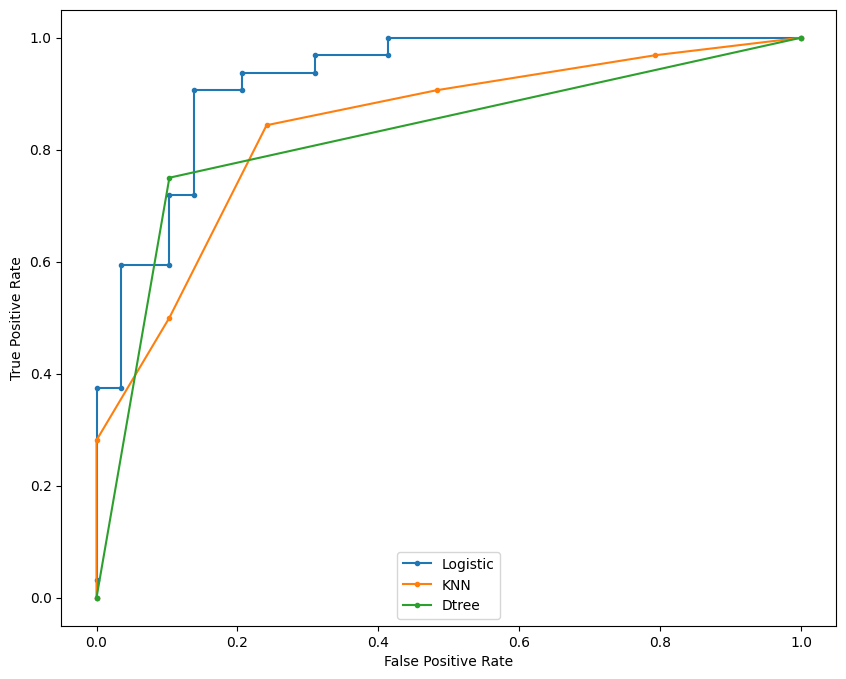

In [136]:
fig,ax=plt.subplots(figsize=(10,8))
ax.plot(logreg_fpr,logreg_tpr,marker='.',label='Logistic')
ax.plot(Knn_fpr,Knn_tpr,marker='.',label='KNN')
ax.plot(Dtree_fpr,Dtree_tpr,marker='.',label='Dtree')
#axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#show the legend
plt.legend(loc=8)
#show the plot
plt.show()

In [137]:
from sklearn.metrics import roc_auc_score
#calculate scores
logreg_auc=roc_auc_score(y_test,logreg_probs)
Knn_auc=roc_auc_score(y_test,Knn_probs)
Dtree_auc=roc_auc_score(y_test,Dtree_probs)
print('Logistic:ROC AUC={} %'.format(round(logreg_auc,3)*100))
print('KNN:ROC AUC={}%'.format(round(Knn_auc,3)*100))
print('DTree:ROC AUC={}%'.format(round(Dtree_auc,3)*100))

Logistic:ROC AUC=92.5 %
KNN:ROC AUC=83.89999999999999%
DTree:ROC AUC=82.3%


Here we get to know that the Logistic regression model is one of the best model